**The Challenge**

The Challenge is to design a model to predict sales for the next week based on previous data observations.
*	The next 7 dates consisting of the week will be chosen based on the latest 'Order Date'.
*	Example: If latest "Order Date" is 2018-06-20, the prediction date starts from 2018-06-21.
*	sample-output.csv has been given as an example of final output file.

Dataset

*	It consists of 18 attributes with "Sales" being the target attribute for prediction.
* NOTE: Some values of attribute "Ship Date" can be NaN as those products had not been shipped by the provided dates
* We recommend Python, SQL, or DataStudio. 
* We definitely gonna value your understanding of the problem and creativity to solve it!

In [1]:
import modin.pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%load_ext scalene

Scalene extension successfully loaded. Note: Scalene currently only
supports CPU+GPU profiling inside Jupyter notebooks. For full Scalene
profiling, use the command line version.


In [9]:
pd.set_option('display.max_columns', None)
dados = pd.read_excel('Sales-Ops.xlsx')
dados.head(3)

In [11]:
# Renomeando os itens numericamente.
dados['Order ID']= pd.factorize(dados['Order ID'])[0]
dados['Customer ID']= pd.factorize(dados['Customer ID'])[0]
dados['Product ID']= pd.factorize(dados['Product ID'])[0]
dados.head(3)

In [12]:
# Selecionando colunas para análise e modelo
dados1 = pd.DataFrame(dados)
dados1.drop(columns=['Row ID','Customer Name','Postal Code','Product Name'], inplace=True)
dados1.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,2017-11-08,2017-11-11,Second Class,0,Consumer,United States,Henderson,Kentucky,South,0,Furniture,Bookcases,261.96,2.0,0.0,41.9136
1,0,2017-11-08,2017-11-11,Second Class,0,Consumer,United States,Henderson,Kentucky,South,1,Furniture,Chairs,731.94,3.0,0.0,219.5820
2,1,2017-06-12,2017-06-16,Second Class,1,Corporate,United States,Los Angeles,California,West,2,Office Supplies,Labels,14.62,2.0,0.0,6.8714


### TRATAMENTO E LIMPEZA DOS DADOS

In [13]:
dados1.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------------  --------------  -----         
 0   Order ID      9994 non-null   int64
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship Mode     9994 non-null   object
 4   Customer ID   9994 non-null   int64
 5   Segment       9994 non-null   object
 6   Country       9994 non-null   object
 7   City          9994 non-null   object
 8   State         9994 non-null   object
 9   Region        9994 non-null   object
 10  Product ID    9994 non-null   int64
 11  Category      9994 non-null   object
 12  Sub-Category  9994 non-null   object
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   float64
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: object(8), float64(4), int64(3), datetime64[ns](2

In [14]:
# Dados nulos
dados1.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
# Qtde de dados únicos
dados.nunique()

Order ID        5009
Order Date      1236
Ship Date       1334
Ship Mode          4
Customer ID      793
Segment            3
Country            1
City             531
State             49
Region             4
Product ID      1862
Category           3
Sub-Category      17
Sales           6144
Quantity          14
Discount          12
Profit          7545
dtype: int64

In [19]:
# Deletando a coluna país pois só tem um
dados1.drop(columns=['Country'], inplace=True)

In [51]:
# Estatística das variáveis numéricas
dados1.describe().round(2)

,Order ID,Customer ID,Product ID,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,2480.28,364.53,827.92,229.86,3.79,0.16,28.66
std,1446.33,223.40,506.52,623.25,2.23,0.21,234.26
min,0.00,0.00,0.00,0.44,1.00,0.00,-6599.98
25%,1225.25,170.00,396.00,17.28,2.00,0.00,1.73
50%,2473.00,353.00,798.00,54.49,3.00,0.20,8.67
75%,3725.75,555.00,1238.00,209.94,5.00,0.20,29.36
max,5008.00,792.00,1861.00,22638.48,14.00,0.80,8399.98


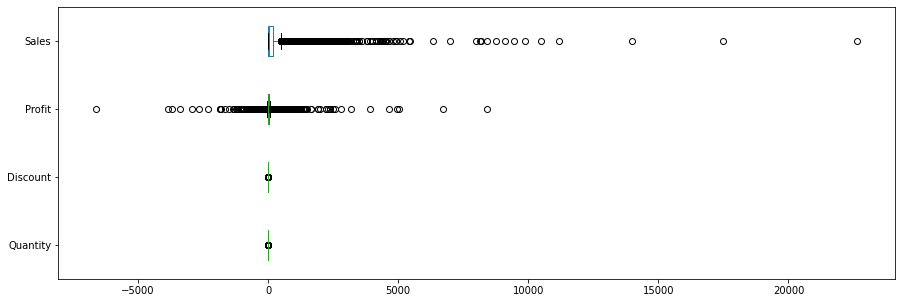

In [47]:
# Boxplot
dados1.boxplot(column=['Quantity','Discount','Profit','Sales' ], grid=False, vert=False, figsize=[15,5]);

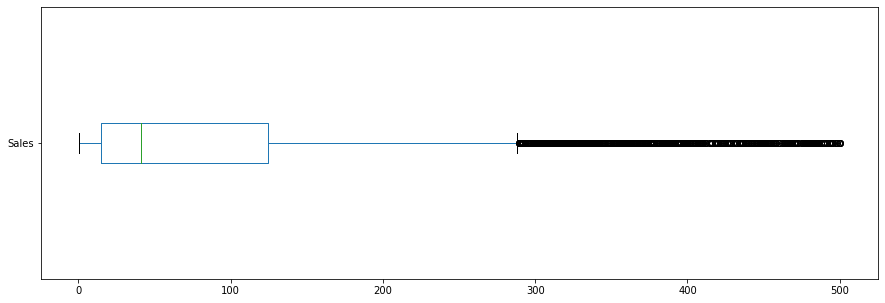

In [74]:
# Boxplot
dados1.boxplot(column='Sales', grid=False, vert=False, figsize=[15,5]);

In [72]:
dados1.drop(dados1[dados1['Sales'] > 500].index, inplace=True)
#dados1[dados1['Sales'] > 500]

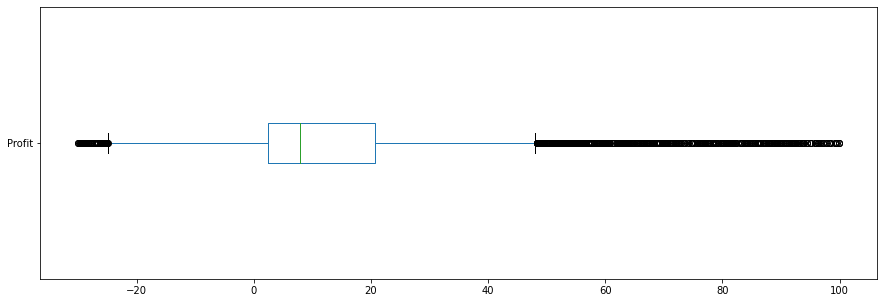

In [106]:
# Boxplot
dados1.boxplot(column='Profit', grid=False, vert=False, figsize=[15,5]);

In [105]:
#dados1.drop(dados1[dados1['Profit'] < -30].index, inplace=True)
dados1.drop(dados1[dados1['Profit'] > 100].index, inplace=True)
#dados1[dados1['Profit'] > 100]

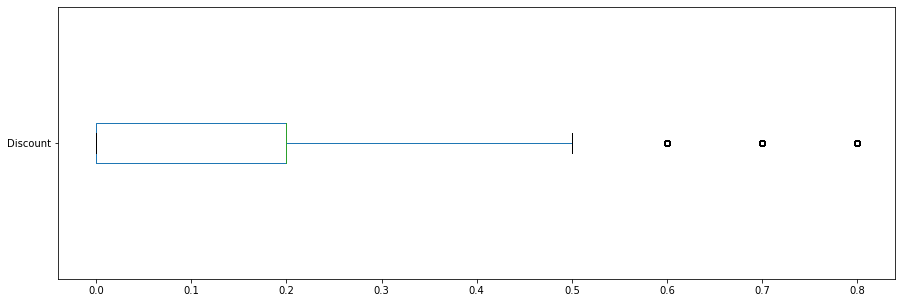

In [49]:
# Boxplot
dados1.boxplot(column='Discount', grid=False, vert=False, figsize=[15,5]);

In [118]:
dados1[dados1['Discount'] > 0.75]
dados1.drop(dados1[dados1['Discount'] > 0.75].index, inplace=True)

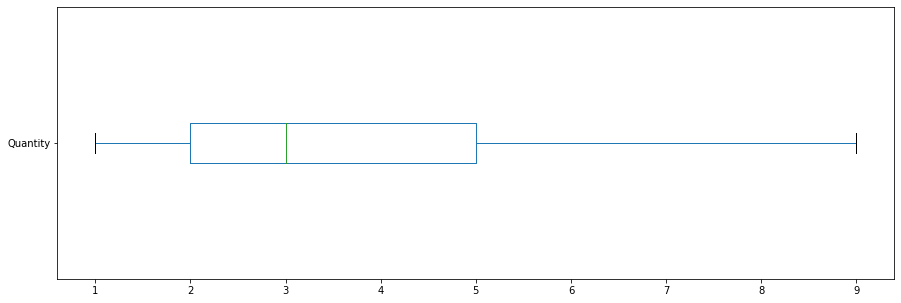

In [125]:
# Boxplot
dados1.boxplot(column='Quantity', grid=False, vert=False, figsize=[15,5]);

In [124]:
dados1[dados1['Quantity'] > 9]
dados1.drop(dados1[dados1['Quantity'] > 9].index, inplace=True)

In [127]:
dados1.shape
dados1.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,2017-11-08,2017-11-11,Second Class,0,Consumer,Henderson,Kentucky,South,0,Furniture,Bookcases,261.960,2.0,0.0,41.9136
2,1,2017-06-12,2017-06-16,Second Class,1,Corporate,Los Angeles,California,West,2,Office Supplies,Labels,14.620,2.0,0.0,6.8714
4,2,2016-10-11,2016-10-18,Standard Class,2,Consumer,Fort Lauderdale,Florida,South,4,Office Supplies,Storage,22.368,2.0,0.2,2.5164


In [153]:
dados1.to_csv('dados_limpos.csv')